In [3]:
import pandas as pd
import numpy as np
import math, sys, pickle
import scipy.misc as smp
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
def printProgress(iteration, total, prefix='', suffix='', decimals=1, barLength=100):
    '''

    :param iteration: Required  : current iteration (Int)
    :param total: Required  : total iterations (Int)
    :param prefix: Optional  : prefix string (Str)
    :param suffix: Optional  : suffix string (Str)
    :param decimals: Optional  : positive number of decimals in percent complete (Int)
    :param barLength: Optional  : character length of bar (Int)
    :return:
    '''

    formatStr = "{0:." + str(decimals) + "f}"
    percents = formatStr.format(100 * (iteration / float(total)))
    filledLength = int(round(barLength * iteration / float(total)))
    bar = '=' * filledLength + '-' * (barLength - filledLength)
    sys.stdout.write('\r%s |%s| %s%s %s' % (prefix, bar, percents, '%', suffix)),
    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()

In [5]:
observations = pd.read_csv('mnist_data.txt', header=None, sep=' ')
labels = pd.read_csv('mnist_labels.txt', header=None)

In [6]:
labels.loc[labels[0]!=8,0]=0
labels.loc[labels[0]==8,0]=1

In [7]:
nFeatures = len(observations.columns)
nObservations = len(observations)

In [8]:
def train(runId):
    w=pd.Series([0]*nFeatures)
    convergence=0
    eta=1
    delta=0

    iteration=1


    while iteration<50:
        gradientVector = pd.Series([0]*nFeatures)
        for index in range(nObservations):
            try:
                p = 1/(1+np.exp(-1*(observations.loc[index].dot(w))))
            except OverflowError:
                p=0
            error = labels.loc[index,0]-p
            gradientVector=gradientVector.add(observations.loc[index].multiply(error))
            #for feature in range(n_features):
            #    gradient_vector[feature]+=error*observations.loc[index,feature]
            printProgress(index+1, nObservations, prefix='Iteration '+str(iteration)+':', suffix='', barLength=50)

        w=w.add(gradientVector.multiply(eta*np.exp(-iteration/3.0)))

        iteration+=1


    with open('lr_weight_vector_'+runId+'.pkl','wb') as outFile:
        pickle.dump(w,outFile)

In [9]:
def train_new(runId, eta, stepInterval):
    w=pd.Series([0]*nFeatures)
    convergence=0
    # eta=0.5
    delta=0

    iteration=1


    while iteration<50:
        gradientVector = pd.Series([0]*nFeatures)
        for index in range(nObservations):
            try:
                p = 1/(1+np.exp(-1*(observations.loc[index].dot(w))))
            except OverflowError:
                p=0
            error = labels.loc[index,0]-p
            gradientVector=gradientVector.add(observations.loc[index].multiply(error))
        w=w.add(gradientVector.multiply(eta*np.exp(-iteration/stepInterval)))
    
        printProgress(iteration, 50, prefix='Training :', suffix='Iteration '+str(iteration), barLength=50)
        iteration+=1

    with open('lr_weight_vector_'+runId+'.pkl','wb') as outFile:
        pickle.dump(w,outFile)

In [10]:
def test(runId):
    with open('lr_weight_vector_'+runId+'.pkl','rb') as inFile:
        w=pickle.load(inFile)
    correctPredictions=0.0
    prediction=1
    for index in range(nObservations):
        try:
            p = 1/(1+np.exp(-1*(observations.loc[index].dot(w))))
        except OverflowError:
            p=0
        if p>=0.5: prediction=1
        else: prediction=0
        if labels.loc[index,0]-prediction==0: correctPredictions+=1
        
    print('Run ID "'+runId+'" : '+str(correctPredictions/nObservations))
    

In [11]:
def paintWeightVector(runId, imageInterpolationType='nearest'):
    with open('lr_weight_vector_'+runId+'.pkl','rb') as inFile:
        w=pickle.load(inFile)
    w=w.multiply(-1)
    w=w.values.reshape(-1,1)
    
    scaler = MinMaxScaler(feature_range=(0,255), copy=True)
    wScaled = scaler.fit_transform(w) 
    
    pixelMap = wScaled.reshape((28,28))

    fig, ax =plt.subplots(figsize=(2,2))
    ax.imshow(pixelMap, cmap='gray', interpolation=imageInterpolationType)
    plt.savefig('weightVector_pixelMap_'+imageInterpolationType+'.png')
    plt.show()

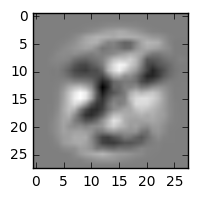

In [12]:
paintWeightVector("eta0.1_step50", 'bilinear')

In [14]:
runs=['eta0.1_step5','eta0.1_step50','eta0.0001_step50','eta1_step3','eta0.5_step5']
for run in runs:
    test(run)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in exp


Run ID "eta0.1_step5" : 0.9188
Run ID "eta0.1_step50" : 0.9367
Run ID "eta0.0001_step50" : 0.9198
Run ID "eta1_step3" : 0.9013
Run ID "eta0.5_step5" : 0.9192


In [17]:
test('eta0.5_step10')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in exp


Run ID "eta0.5_step10" : 0.93
